## Machine Learning - Desafío 2, Expansiones basales
#### Gustavo Morales, G10 - 20.Nov.2019, (Miércoles Semana 1)

### Preparación del Ambiente de Trabajo y Descripción

Importamos las librerías pertinentes:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
import seaborn as sns
from sklearn.model_selection import train_test_split
from pygam import LinearGAM #dado que el vector objectivo es continuo
from pygam.utils import generate_X_grid 
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error
plt.style.use('seaborn-notebook')
%matplotlib inline

Cargamos el archivo y hacemos el trabajo exploratorio:

In [2]:
fname = 'compresive_strength_concrete.csv'
df = pd.read_csv(fname)
df.sample(5)

Cement (component 1)(kg in a m^3 mixture)  \
149                                      425.0   
578                                      193.5   
604                                      339.0   
482                                      446.0   
223                                      166.1   

     Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
149                                              106.3       
578                                              290.2       
604                                                0.0       
482                                               24.0       
223                                                0.0       

     Fly Ash (component 3)(kg in a m^3 mixture)  \
149                                         0.0   
578                                         0.0   
604                                         0.0   
482                                        79.0   
223                                       163.3   

     Water  (component 4)(kg in a m^3 mixture)  \
149                                      153.5   
578                                      185.7   
604                                      197.0   
482                                      162.0   
223                                      176.5   

     Superplasticizer (component 5)(kg in a m^3 mixture)  \
149                                               16.5     
578                                                0.0     
604                                                0.0     
482                                               11.6     
223                                                4.5     

     Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
149                                              852.1      
578                                              998.2      
604                                              968.0      
482                                              967.0      
223                                             1058.6      

     Fine Aggregate (component 7)(kg in a m^3 mixture)  Age (day)  \
149                                              887.1         56   
578                                              704.3          7   
604                                              781.0        365   
482                                              712.0         56   
223                                              780.1        100   

     Concrete compressive strength(MPa, megapascals)   
149                                             64.30  
578                                             17.20  
604                                             38.89  
482                                             56.14  
223                                             33.54

In [3]:
df.rename(columns={'Cement (component 1)(kg in a m^3 mixture)':'cement',
                   'Blast Furnace Slag (component 2)(kg in a m^3 mixture)': 'blast_furnace_slag',
                   'Fly Ash (component 3)(kg in a m^3 mixture)': 'fly_ash',
                   'Water  (component 4)(kg in a m^3 mixture)': 'water',
                   'Superplasticizer (component 5)(kg in a m^3 mixture)': 'superplasticizer',
                   'Coarse Aggregate  (component 6)(kg in a m^3 mixture)': 'coarse_agg',
                   'Fine Aggregate (component 7)(kg in a m^3 mixture)': 'fine_agg',
                   'Age (day)': 'age',
                   'Concrete compressive strength(MPa, megapascals) ': 'ccs'},
          inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement                1030 non-null float64
blast_furnace_slag    1030 non-null float64
fly_ash               1030 non-null float64
water                 1030 non-null float64
superplasticizer      1030 non-null float64
coarse_agg            1030 non-null float64
fine_agg              1030 non-null float64
age                   1030 non-null int64
ccs                   1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [5]:
df.isnull().sum(axis = 0)

cement                0
blast_furnace_slag    0
fly_ash               0
water                 0
superplasticizer      0
coarse_agg            0
fine_agg              0
age                   0
ccs                   0
dtype: int64

In [6]:
df.describe()

cement  blast_furnace_slag      fly_ash        water  \
count  1030.000000         1030.000000  1030.000000  1030.000000   
mean    281.167864           73.895825    54.188350   181.567282   
std     104.506364           86.279342    63.997004    21.354219   
min     102.000000            0.000000     0.000000   121.800000   
25%     192.375000            0.000000     0.000000   164.900000   
50%     272.900000           22.000000     0.000000   185.000000   
75%     350.000000          142.950000   118.300000   192.000000   
max     540.000000          359.400000   200.100000   247.000000   

       superplasticizer   coarse_agg     fine_agg          age          ccs  
count       1030.000000  1030.000000  1030.000000  1030.000000  1030.000000  
mean           6.204660   972.918932   773.580485    45.662136    35.817961  
std            5.973841    77.753954    80.175980    63.169912    16.705742  
min            0.000000   801.000000   594.000000     1.000000     2.330000  
25%            0.000000   932.000000   730.950000     7.000000    23.710000  
50%            6.400000   968.000000   779.500000    28.000000    34.445000  
75%           10.200000  1029.400000   824.000000    56.000000    46.135000  
max           32.200000  1145.000000   992.600000   365.000000    82.600000

Gráficos de cajas:

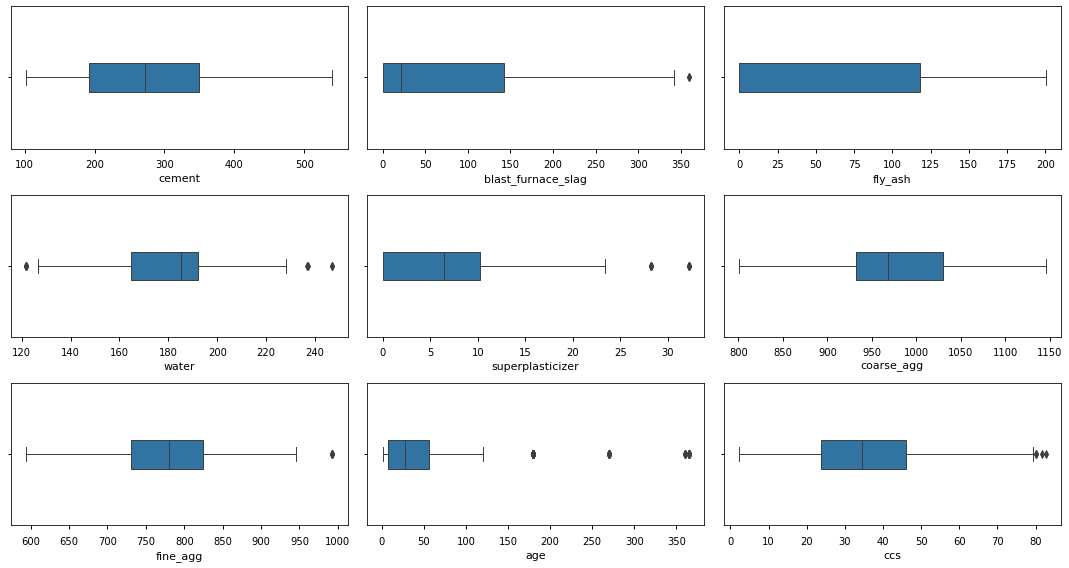

In [7]:
plt.rcParams['figure.figsize'] = 15, 8
var_lst = df.columns.tolist()
for i, var in enumerate(var_lst):
    plt.subplot(3,3,i+1)
    sns.boxplot(x=df[var], width=0.2, color=None, linewidth=1.0)
plt.tight_layout()

Matriz de gráficos de distribuciones:

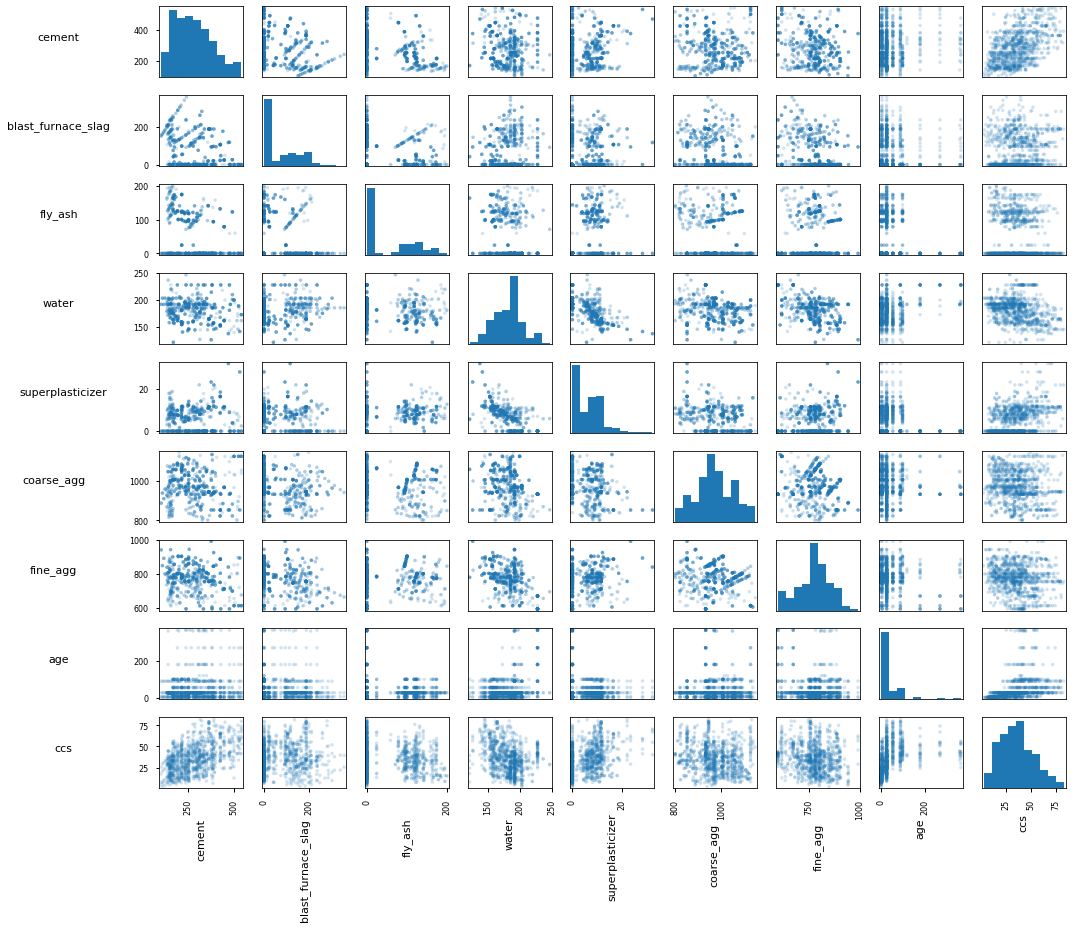

In [8]:
plt.rcParams['figure.figsize'] = 15, 13
axs = pd.plotting.scatter_matrix(df, alpha=0.2, diagonal='hist')
for x in range(len(df.columns)):
    for y in range(len(df.columns)):
        ax = axs[x, y]  # to get the axis of subplots
        ax.xaxis.label.set_rotation(90)  # to make x axis name vertical
        ax.yaxis.label.set_rotation(0)  # to make y axis name horizontal 
        ax.yaxis.labelpad = 75  # to make sure y axis names are outside the plot area
plt.tight_layout()

Histogramas de las variables:

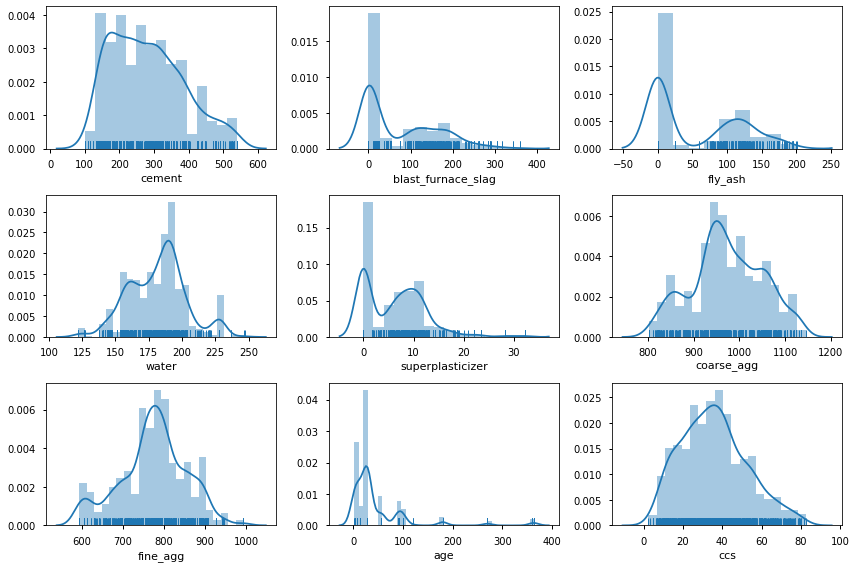

In [9]:
plt.rcParams['figure.figsize'] = 12, 8
for i, var in enumerate(var_lst):
    plt.subplot(3,3,i+1)
    sns.distplot(df[var], rug=True)
plt.tight_layout()

**(R)** Las distribuciones se ven bastante bien comportadas y no considero necesario normalizar.

### Modelación

In [10]:
X = df.drop(['ccs'], axis=1)  # features
y = df['ccs']  # target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

**(1)** Modelo sin implementar `gridsearch` con `lam = 1000`:

In [11]:
gam_1000 = LinearGAM(lam = 1e3)
gam_1000.fit(X_train, y_train)

LinearGAM(callbacks=[Deviance(), Diffs()], constraints=None, 
   dtype='auto', fit_intercept=True, fit_linear=False, 
   fit_splines=True, lam=1000.0, max_iter=100, n_splines=25, 
   penalties='auto', scale=None, spline_order=3, tol=0.0001, 
   verbose=False)

In [12]:
gam_1000.lam

1000.0

In [13]:
gam_1000.summary()


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     22.2365
Link Function:                     IdentityLink Log Likelihood:                                 -3342.0073
Number of Samples:                          690 AIC:                                             6730.4876
                                                AICc:                                            6732.1794
                                                GCV:                                               53.2223
                                                Scale:                                             50.1441
                                                Pseudo R-Squared:                                   0.8254
Feature Function   Data Type      Num

**(2)** Modelo con `gridsearch` que usa por defecto un `logspace` entre -3 y 3:

In [14]:
gam_gs = LinearGAM().gridsearch(X_train, y_train)

100% (11 of 11) |########################| Elapsed Time: 0:00:02 Time:  0:00:02


In [15]:
gam_gs.lam

0.25118864315095796

In [16]:
gam_gs.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    106.6319
Link Function:                     IdentityLink Log Likelihood:                                  -2802.875
Number of Samples:                          690 AIC:                                             5821.0138
                                                AICc:                                             5861.237
                                                GCV:                                               31.3227
                                                Scale:                                             22.7512
                                                Pseudo R-Squared:                                   0.9308
Feature Function   Data Type      Num

El mejor modelo se puede decidir mirando las siguientes métricas:

In [17]:
R2= [(r2_score(gam_1000.predict(X_test), y_test)),
     (r2_score(gam_gs.predict(X_test), y_test))]
MSE= [(mean_squared_error(gam_1000.predict(X_test), y_test)),
       (mean_squared_error(gam_gs.predict(X_test), y_test))]
MAE= [(median_absolute_error(gam_1000.predict(X_test), y_test)),
      (median_absolute_error(gam_gs.predict(X_test), y_test))]
pd.DataFrame(data={'R2': R2, 'MSE': MSE, 'MAE': MAE},
             index=['GAM_1000','GAM_Grid']).transpose()

GAM_1000   GAM_Grid
R2    0.699521   0.872361
MSE  56.935460  30.970537
MAE   4.687701   3.594511

**(R)** Es decir, claramente el mejor modelo es el que sale de usar el método `grid_search`: tiene mejor R$^2$, y diferencias MSE y MAE más pequeñas.

### Dependencia Parcial

In [18]:
def plot_partial_dep(gam_model, attributes):
    X_grid = generate_X_grid(gam_model)
    for i, n in enumerate(range(len(attributes))):
        plt.subplot(2, 4, i + 1)
        partial_dep, confidence_intervals = gam_model.partial_dependence(X_grid,
                                                                         feature=i+1,
                                                                         width=.95)
        plt.plot(X_grid[:, n], partial_dep, color='tomato')
        plt.fill_between(X_grid[:, n],
                         confidence_intervals[0][:, 0],
                         confidence_intervals[0][:,1],
                         alpha=.25)
        plt.title(attributes[n])
        plt.scatter(X_train[attributes[n]],
                    [plt.ylim()[0]] * len(X_train[attributes[n]]),
                    marker='|', alpha=.5)
    plt.tight_layout()

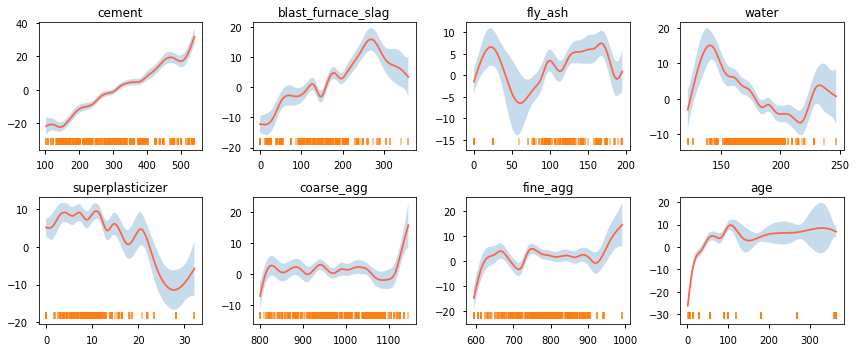

In [19]:
plt.rcParams['figure.figsize'] = 12, 5
plot_partial_dep(gam_gs, X_train.columns)

**(R)** Estos gráficos representan el valor predicho para la resistencia compresiva del concreto:

* `cement`: a mayor cantidad de cemento hay mayor resistencia a la compresión del concreto.
* `blast_furnace_slag`: a mayor escoria metalúrgica la resistencia a la compresión es mayor, hasta cierto valor crítico en donde comienza a disminuir.
* `fly_ash`: respecto de las cenizas el comportamiento es más bien variable.
* `water`: en general, a menor cantidad de agua mayor es la resistencia.
* `superplasticizer`: salvo variaciones a escalas menores, a mayor cantidad de plastificante la resitencia del concreto disminuye.
* `coarse_agg`: el espesante grueso tiende a no tener influencia en la resistencia, salvo a escalas más grandes.
* `fine_agg`: lo mismo se puede decir para el espesante más fino.
* `age`: la resistencia del concreto se incrementa rápidamente con los días, estabilizándose luego de cierto valor crítico.

**(R)**
- Atributos asociados a mayores niveles de resistencia: `cement`, `blast_furnace_slag`, y ambos espesantes a escalas grandes.
- Atributos asociados a mayores niveles de resistencia: `superplasticizer` y `water`, ambos a escalas grandes, y lógicamente `age` a escalas muy chicas. 